In [ ]:
# 4) Datos atípicos y distribución normal

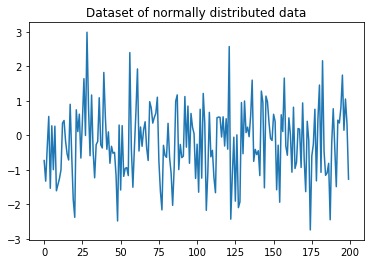

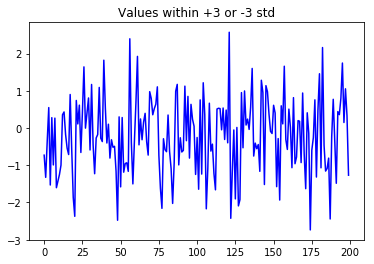

In [37]:
# 4.1 Datos atípicos y cuartiles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.DataFrame({'Data':np.random.normal(size=200)})  #example dataset of normally distributed data. 

df2 = df[np.abs(df.Data-df.Data.mean())<=(3*df.Data.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.

# df[~(np.abs(df.Data-df.Data.mean())>(3*df.Data.std()))] #or if you prefer the other way around

plt.plot(df)
plt.title('Dataset of normally distributed data')
plt.show()

plt.plot(df2,color='blue')
plt.title('Values within +3 or -3 std')
plt.show()

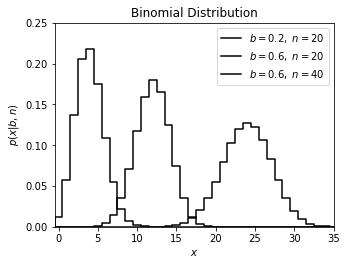

In [13]:
# 4.2 Distribución binomial

# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy.stats import binom
from matplotlib import pyplot as plt

#------------------------------------------------------------
# Define the distribution parameters to be plotted
n_values = [20, 20, 40]
b_values = [0.2, 0.6, 0.6]
linestyles = ['-', '--', ':']
x = np.arange(-1, 200)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(5, 3.75))

for (n, b, ls) in zip(n_values, b_values, linestyles):
    # create a binomial distribution
    dist = binom(n, b)

    plt.plot(x, dist.pmf(x), ls=ls, c='black',
             label=r'$b=%.1f,\ n=%i$' % (b, n), linestyle='steps-mid')

plt.xlim(-0.5, 35)
plt.ylim(0, 0.25)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|b, n)$')
plt.title('Binomial Distribution')

plt.legend()
plt.show()


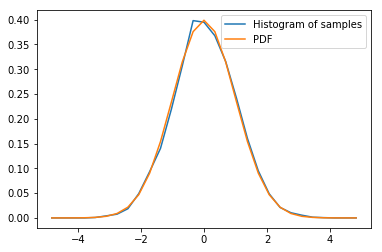

In [15]:
# 4.3 Manipulando distribución normal

# https://www.scipy-lectures.org/intro/scipy/auto_examples/plot_normal_distribution.html

# Sample from a normal distribution using numpy's random number generator
samples = np.random.normal(size=10000)

# Compute a histogram of the sample
bins = np.linspace(-5, 5, 30)
histogram, bins = np.histogram(samples, bins=bins, normed=True)

bin_centers = 0.5*(bins[1:] + bins[:-1])

# Compute the PDF on the bin centers from scipy distribution object
from scipy import stats
pdf = stats.norm.pdf(bin_centers)

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(bin_centers, histogram, label="Histogram of samples")
plt.plot(bin_centers, pdf, label="PDF")
plt.legend()
plt.show()

In [ ]:
# 5) Inferencia

In [21]:
# 5.1 Intervalos de confianza

# https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data

import scipy as sp
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

a = range(10,14)

mean_confidence_interval(a)

(11.5, 9.445739743239121, 13.554260256760879)

In [26]:
# 5.2 Pruebas de hipótesis

# https://stackoverflow.com/questions/44206600/how-to-conduct-hypothesis-testing-in-python
# Random sample is normally distributed using the Kolmogorov-Smirnov test

import numpy as np
from scipy.stats import norm, pareto, kstest

n = 1000
sample_norm = norm.rvs(size=1000)  # generate normally distributed random sample
sample_pareto = pareto.rvs(1.0, size=1000)  # sample from some other distribution for comparison

d_norm, p_norm = kstest(sample_norm, norm.cdf)  # test if the sample_norm is distributed normally (correct hypothesis)
d_pareto, p_pareto = kstest(sample_pareto, norm.cdf)  # test if the sample_pareto is distributed normally (false hypothesis)

print('Statistic values: %.4f, %.4f' % (d_norm, d_pareto))
print('P-values: %.4f, %.4f' % (p_norm, p_pareto))

Statistic values: 0.0301, 0.8415
P-values: 0.3201, 0.0000


In [ ]:
# 6) Regresión

('Coefficients: \n', array([938.23786125]))
Mean squared error: 2548.07
Variance score: 0.47


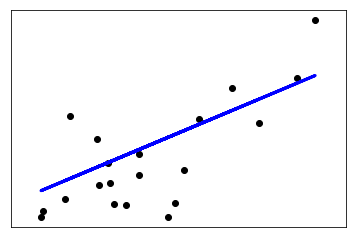

In [28]:
# 6.1 Regresión lineal

# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

''' This example uses the only the first feature of the diabetes dataset, in order to illustrate a two-dimensional plot 
of this regression technique. The straight line can be seen in the plot, showing how linear regression attempts to draw a 
straight line that will best minimize the residual sum of squares between the observed responses in the dataset, and the 
responses predicted by the linear approximation.

The coefficients, the residual sum of squares and the variance score are also calculated.
'''

# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


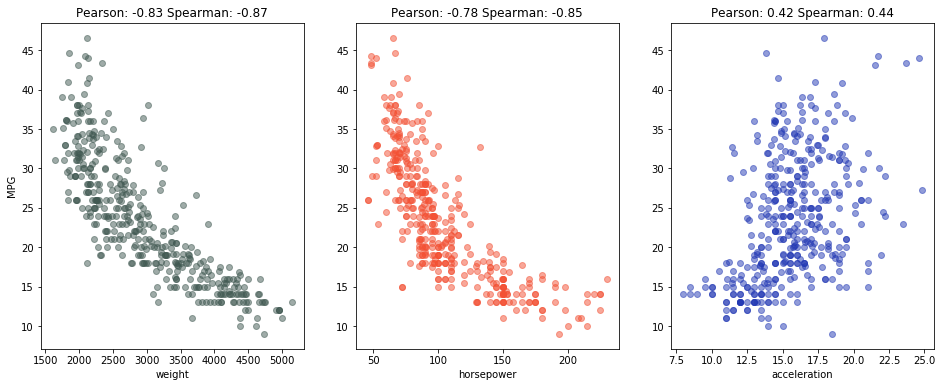

In [43]:
# 6.2 Correlación

# https://www.datascience.com/learn-data-science/fundamentals/introduction-to-correlation-python-data-science

import pandas as pd
#path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
path = 'C:\Users\luisaar\Documents\\auto-mpg.data.csv'

#mpg_data = pd.read_csv(path, delim_whitespace=True, header=None,
mpg_data = pd.read_csv(path, header=None, 
            names = ['mpg', 'cylinders', 'displacement','horsepower',
            'weight', 'acceleration', 'model_year', 'origin', 'name'],
            na_values='?')

mpg_data.info()

mpg_data['mpg'].corr(mpg_data['weight'])

# pairwise correlation
mpg_data.drop(['model_year','origin'], axis=1).corr(method='spearman')

# plot correlated values
plt.rcParams['figure.figsize'] = [16, 6]

fig, ax = plt.subplots(nrows=1, ncols=3)

ax=ax.flatten()

cols = ['weight', 'horsepower', 'acceleration']
colors=['#415952', '#f35134', '#243AB5', '#243AB5']
j=0

for i in ax:
    if j==0:
        i.set_ylabel('MPG')
    i.scatter(mpg_data[cols[j]], mpg_data['mpg'],  alpha=0.5, color=colors[j])
    i.set_xlabel(cols[j])
    i.set_title('Pearson: %s'%mpg_data.corr().loc[cols[j]]['mpg'].round(2)+' Spearman: %s'%mpg_data.corr(method='spearman').loc[cols[j]]['mpg'].round(2))
    j+=1

plt.show()

